In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymap3d as pm


In [3]:
plt.rcParams["figure.figsize"] = (10,10) 

In [4]:
df = pd.read_csv('ft.csv')

# Visulizing the distribution of sampling time

Text(0.5, 1.0, 'Distribution of interval between sampling points in flight track')

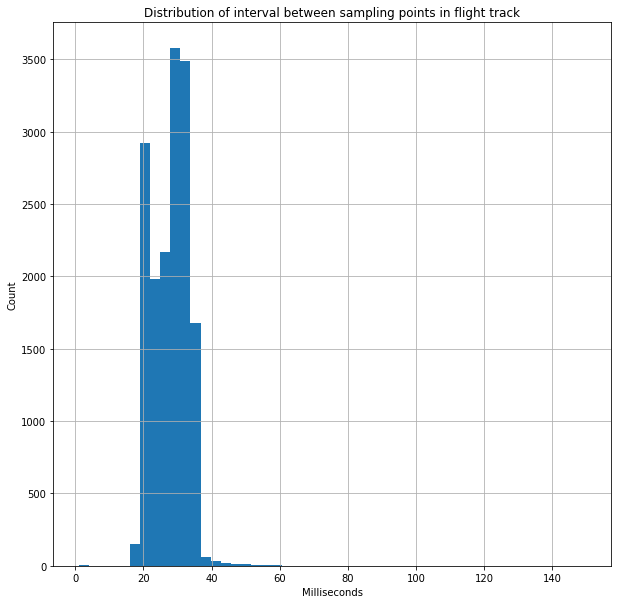

In [5]:
ax=df['Milliseconds'].diff().hist(bins=50)
ax.set_xlabel('Milliseconds')
ax.set_ylabel('Count')
ax.set_title('Distribution of interval between sampling points in flight track')

Lets also get counts as numbers for the bins with 10ms interval up 100ms and then the count above 100ms

In [7]:
np.histogram(df['Milliseconds'].diff()[1:].to_numpy(),bins=[0,10,20,30,40,50,60,70,80,90,100,float('Inf')])[0]

array([   7,  779, 8856, 6382,   60,   18,    5,    3,    0,    1,    4],
      dtype=int64)

# Visualize a flight path

In [8]:
path=df[['Latitude','Longitude','Altitude']].to_numpy()

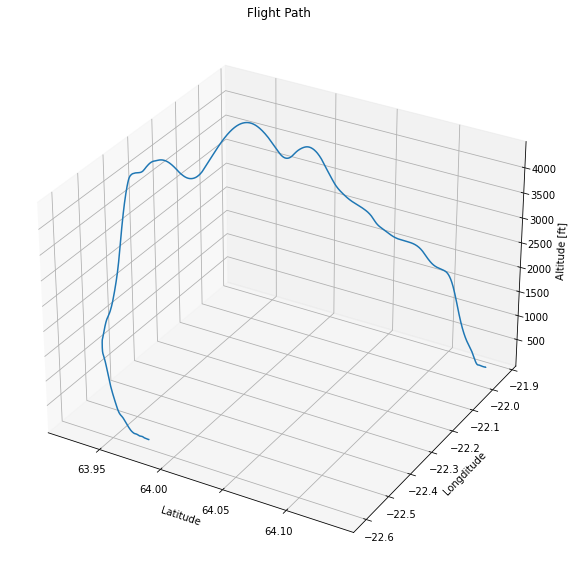

In [14]:
ax = plt.axes(projection='3d')
ax.plot3D(path[:,0],path[:,1],path[:,2])
ax.set_xlabel('Latitude')
ax.set_ylabel('Longditude')
ax.set_zlabel('Altitude [ft]')
ax.set_title('Flight Path')
plt.savefig('path.png',dpi=100)

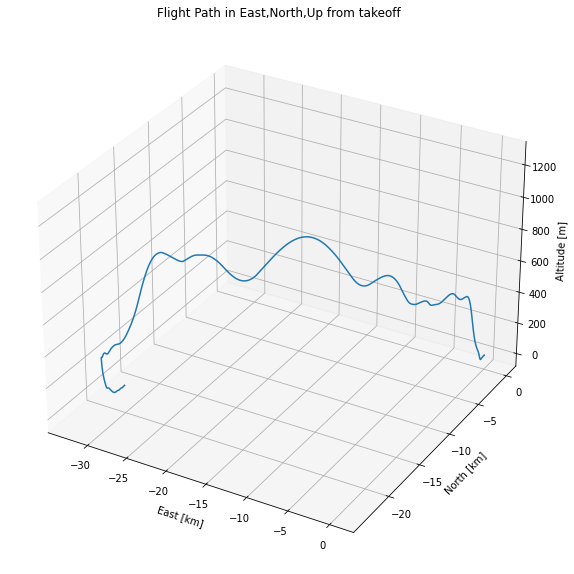

In [15]:
east,north,up = pm.geodetic2enu(path[:,0], path[:,1], path[:,2]/3.281, path[0,0], path[0,1], 0)

ax = plt.axes(projection='3d')
ax.plot3D(east/1000, north/1000, up)
ax.set_xlabel('East [km]')
ax.set_ylabel('North [km]')
ax.set_zlabel('Altitude [m]')
ax.set_title('Flight Path in East,North,Up from takeoff')
plt.savefig('path.png',dpi=100)